Lets train a FFNN for a Regression Problem

In [ ]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

Reading the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Course/movies.csv')
df

,Unnamed: 0,Movie Name,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
0,0,The Shawshank Redemption,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
1,1,The Godfather,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
2,2,Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
3,3,The Chaos Class,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
4,4,The Dark Knight,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Golmaal Again,2017,140,4.9,10183,NaN,1010000.0,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreya...","['The', 'gang', 'encounters', 'with', 'some', ..."
9996,9996,Not to Forget,2021,84,4.9,11191,NaN,NaN,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum ...","['After', 'a', 'lifetime', 'of', 'scams,', 'a'..."
9997,9997,Housefull 3,2016,140,4.9,10308,NaN,1160000.0,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish...","['A', 'father', ""doesn't"", 'want', 'his', 'thr..."
9998,9998,A.I. Rising,2018,85,4.9,11187,NaN,NaN,"['Drama', ' Romance', ' Sci-Fi']",R,['Lazar Bodroza'],"['Sebastian Cavazza', 'Stoya', 'Marusa Majer',...","['An', 'intimate', 'relationship', 'between', ..."


In [ ]:
data=df[["Year of Release","Run Time in minutes","Votes"]].values
target=df["Movie Rating"].values
print(data)
print(target)

[[   1994     142 2804443]
 [   1972     175 1954174]
 [   1993     135   12995]
 ...
 [   2016     140   10308]
 [   2018      85   11187]
 [   2019      87   10324]]
[9.3 9.2 9.2 ... 4.9 4.9 4.9]


Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
target=np.reshape(target,(-1,1))

scaler_data=MinMaxScaler()
scaler_target=MinMaxScaler()

scaler_data.fit(data)
scaler_target.fit(target)

data_scaled=scaler_data.transform(data)
target_scaled=scaler_target.transform(target)

print(data_scaled)
print(target_scaled)

[[7.31481481e-01 2.46192893e-01 1.00000000e+00]
 [5.27777778e-01 3.29949239e-01 6.95728412e-01]
 [7.22222222e-01 2.28426396e-01 1.07105500e-03]
 ...
 [9.35185185e-01 2.41116751e-01 1.09503117e-04]
 [9.53703704e-01 1.01522843e-01 4.24056189e-04]
 [9.62962963e-01 1.06598985e-01 1.15228770e-04]]
[[1.        ]
 [0.97727273]
 [0.97727273]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]


Why Scaling?

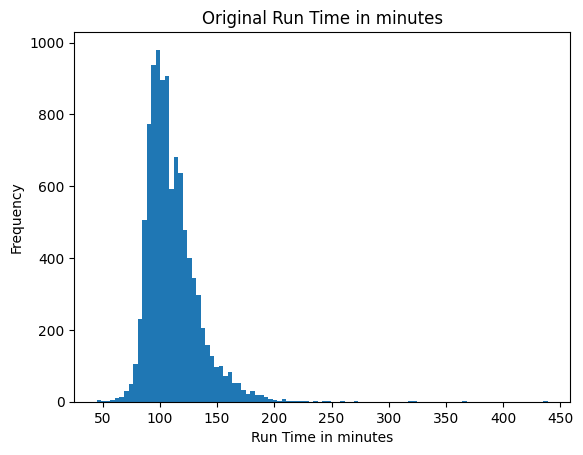

In [ ]:
plt.hist(data[:,1], bins=100)
plt.title('Original Run Time in minutes')
plt.xlabel('Run Time in minutes')
plt.ylabel('Frequency')
plt.show()

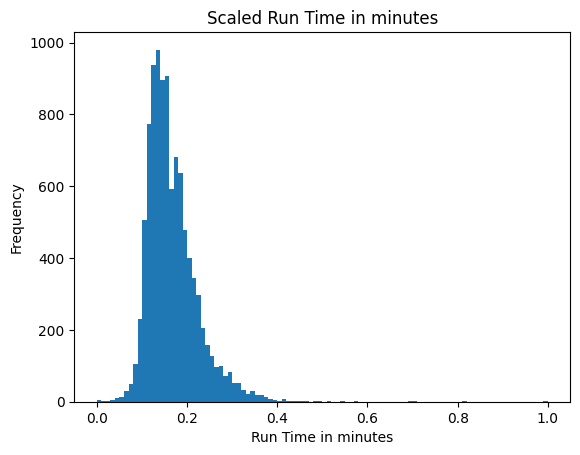

In [ ]:
plt.hist(data_scaled[:,1], bins=100)
plt.title('Scaled Run Time in minutes')
plt.xlabel('Run Time in minutes')
plt.ylabel('Frequency')
plt.show()

Other Scaling Methods

In [ ]:
# 1 Standard Scaling
from sklearn.preprocessing import StandardScaler

standard_scaler=StandardScaler()
standard_scaled_data=standard_scaler.fit_transform(data)

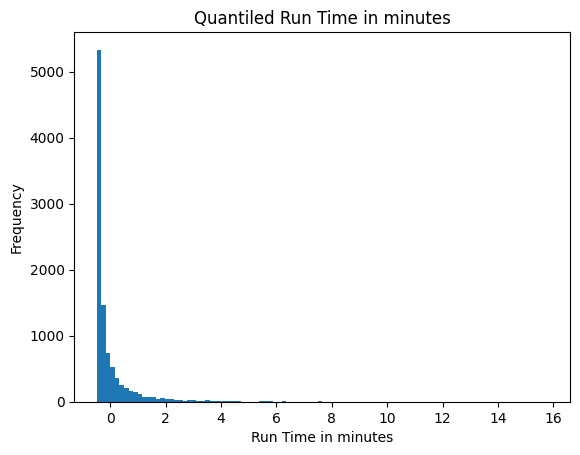

In [ ]:
plt.hist(standard_scaled_data[:,2], bins=100)
plt.title('Quantiled Run Time in minutes')
plt.xlabel('Run Time in minutes')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Quantile Transformation
from sklearn.preprocessing import QuantileTransformer

qtrans=QuantileTransformer(output_distribution='normal', random_state=0)
quantile_transformed_data=qtrans.fit_transform(data)

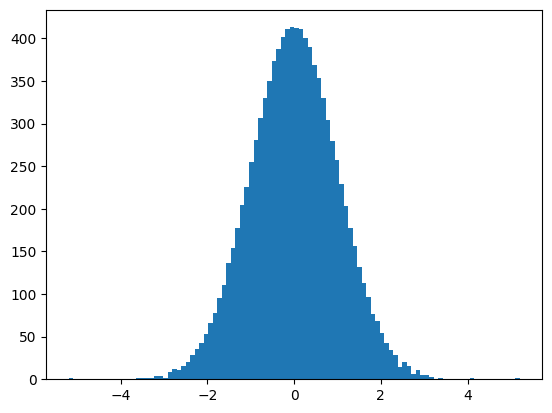

In [ ]:
plt.hist(quantile_transformed_data[:,2], bins=100)
plt.show()

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target=train_test_split(data_scaled, target_scaled, test_size=0.2)

FFNN Architecture

In [ ]:
import keras.models as models
import keras.layers as layers
import keras.optimizers as optimizers
from keras.layers import Dropout
import numpy as np

model=models.Sequential()
model.add(layers.Dense(32, input_dim=3,activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                128       
                                                                 
 dense_14 (Dense)            (None, 128)               4224      
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 8)                 264       
                                                                 
 dense_18 (Dense)            (None, 1)                 9         
                                                                 
Total params: 14961 (58.44 KB)
Trainable params: 14961

In [ ]:
history=model.fit(train_data,train_target,epochs=200,validation_data=(test_data, test_target))

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 0.0547 - mse: 0.0547 - mae: 0.1835 - val_loss: 0.0245 - val_mse: 0.0245 - val_mae: 0.1259
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0245 - mse: 0.0245 - mae: 0.1262 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1248
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1251 - val_loss: 0.0238 - val_mse: 0.0238 - val_mae: 0.1240
Epoch 4/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1241 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.1241
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1238 - val_loss: 0.0238 - val_mse: 0.0238 - val_mae: 0.1233
Epoch 6/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1235 - val_loss: 0.0237 - val_mse: 0.0237 - val_mae: 0.1240
Epoch 7/20

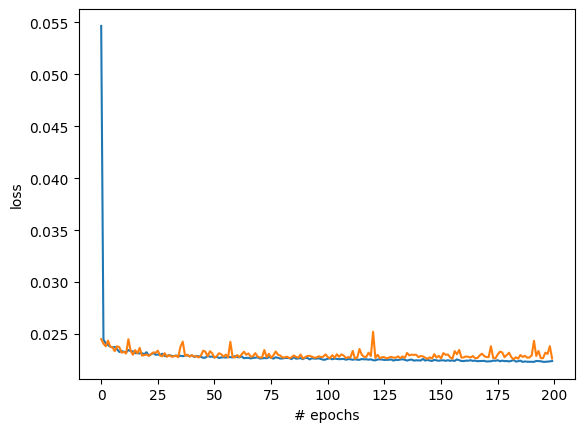

In [ ]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
predicted_result=model.predict(test_data)

r2=r2_score(test_target, predicted_result)
print('r2 score:', r2)

63/63 [==============================] - 0s 1ms/step
r2 score: 0.3531916087213386


In [ ]:
print('actual:', test_target[:10].T)
print('predicted:',predicted_result[:10].T)

actual: [[0.54545455 0.56818182 0.77272727 0.68181818 0.52272727 0.25
  0.29545455 0.34090909 0.65909091 0.18181818]]
predicted: [[0.53497833 0.2520682  0.5823086  0.3408712  0.51991135 0.316455
  0.24889696 0.35039872 0.34828618 0.39018488]]


In [ ]:
print('actual inverse scaled:',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[7.3 7.4 8.3 7.9 7.2 6.  6.2 6.4 7.8 5.7]]
predicted inverse scaled: [[7.2539043 6.0091    7.4621577 6.399833  7.1876097 6.2924023 5.9951468
  6.4417543 6.432459  6.6168137]]


In [ ]:
my_test_data=[2024,76,3000]
my_test_data=scaler_data.transform([my_test_data])
result=model.predict(my_test_data)
predicted=scaler_target.inverse_transform(result)
actual=6.2
print('Actual Result:',actual)
print('Predicted Result:',predicted)

1/1 [==============================] - 0s 37ms/step
Actual Result: 6.2
Predicted Result: [[6.5523057]]


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/DL_Course/movie_rating.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Save Model and scaler

In [ ]:
import joblib

In [ ]:
# Save scaler_data
joblib.dump(scaler_data, "/content/drive/MyDrive/Colab Notebooks/DL_Course/movie/scaler_data.pkl")

# Save scaler_target
joblib.dump(scaler_target, "/content/drive/MyDrive/Colab Notebooks/DL_Course/movie/scaler_target.pkl")

# Save model
joblib.dump(model, "/content/drive/MyDrive/Colab Notebooks/DL_Course/movie/model.pkl")

['/content/drive/MyDrive/Colab Notebooks/DL_Course/movie/model.pkl']

fastapi

In [ ]:
!pip install fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import joblib

In [ ]:
# Load your scaler and model
scaler_data = joblib.load("/content/drive/MyDrive/Colab Notebooks/DL_Course/movie/scaler_data.pkl")
scaler_target = joblib.load("/content/drive/MyDrive/Colab Notebooks/DL_Course/movie/scaler_target.pkl")
model = joblib.load("/content/drive/MyDrive/Colab Notebooks/DL_Course/movie/model.pkl")

In [ ]:
# Define FastAPI app
app = FastAPI()

In [ ]:
# Define request body model
class InputData(BaseModel):
    year: int
    time: float
    votes: float

# Define endpoint for prediction
@app.post("/predict/")
async def predict(data: InputData):
    # Convert input data to numpy array
    input_data = np.array([data.year, data.time, data.votes])
    # Scale input data
    scaled_data = scaler_data.transform([input_data])
    # Predict
    result = model.predict(scaled_data)
    # Inverse transform predicted result
    predicted_result = scaler_target.inverse_transform(result)
    # Prepare response
    response = {
        "predicted_result": predicted_result[0]
    }
    return response

In [ ]:
def predict(data: InputData):
    # Convert input data to numpy array
    input_data = np.array([data.year, data.time, data.votes])
    # Scale input data
    scaled_data = scaler_data.transform([input_data])
    # Predict
    result = model.predict(scaled_data)
    # Inverse transform predicted result
    predicted_result = scaler_target.inverse_transform(result)
    # Prepare response
    response = {
        "predicted_result": predicted_result[0][0]
    }
    return response

In [ ]:
# Example input data
input_data = InputData(year=2024, time=76.0, votes=3000)

# Call the predict function
prediction_result = predict(input_data)
print(prediction_result)

1/1 [==============================] - 0s 38ms/step
{'predicted_result': 6.5523057}


In [ ]:
import tensorflow as tf
print(joblib.__version__)

1.4.0
